# Programming Design

> Python for Data Science(A Glimpse)

Yao-Jen Kuo <yaojenkuo@ntu.edu.tw> from [DATAINPOINT](https://www.datainpoint.com/)

## Modern Data Science

## The definition of modern data science

> Modern data science is a huge field, it involves applications and tools like importing, tidying, transformation, visualization, modeling, and communication. Surrounding all these is programming.

![Imgur](https://i.imgur.com/din6Ig6.png)

Source: [R for Data Science](https://r4ds.had.co.nz/)

## How to apply Python in modern data science

- Requests: Import.
- BeautifulSoup4: Import.
- NumPy: Import, Tidy, Transform, Visualize, Model.
- Pandas: Import, Tidy, Transform, Visualize.
- Matplotlib: Visualize, Communicate.
- Scikit-Learn: Model.
- TensorFlow.Keras: Model.

## Create an environment for data science

```bash
(base) conda create --name datascience python=3.9
(base) conda activate datascience
(datascience) conda install requests numpy pandas matplotlib scikit-learn
(datascience) pip install tensorflow
```

## A Glimpse on Requests

## What is Requests?

> Requests is an elegant and simple HTTP library for Python, built for human being.

Source: <https://requests.readthedocs.io/en/master>

In [2]:
import requests

##  Common HTTP request methods in web scraping

- GET method.
- POST method.

Source: <https://developer.mozilla.org/en-US/docs/Web/HTTP/Methods>

## Requesting data with functions

- `requests.get(request_url)`: Make a request with GET method.
- `requests.post(request_url)`: Make a request with POST method.

In [3]:
# requests.get()
request_url = "https://www.imdb.com/chart/top"
request_headers = {
    "accept-language": "en-US,en;q=1.0"
}
response = requests.get(request_url, headers=request_headers)
print(response.status_code)

200


In [4]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(response.text)
titles = [e.text.strip() for e in soup.select(".titleColumn a")]
print(titles)

['The Shawshank Redemption', 'The Godfather', 'The Dark Knight', 'The Godfather Part II', '12 Angry Men', "Schindler's List", 'The Lord of the Rings: The Return of the King', 'Pulp Fiction', 'The Lord of the Rings: The Fellowship of the Ring', 'The Good, the Bad and the Ugly', 'Forrest Gump', 'Fight Club', 'The Lord of the Rings: The Two Towers', 'Inception', 'Star Wars: Episode V - The Empire Strikes Back', 'The Matrix', 'Goodfellas', "One Flew Over the Cuckoo's Nest", 'Se7en', "It's a Wonderful Life", 'Seven Samurai', 'The Silence of the Lambs', 'Saving Private Ryan', 'City of God', 'Interstellar', 'Life Is Beautiful', 'The Green Mile', 'Star Wars: Episode IV - A New Hope', 'Terminator 2: Judgment Day', 'Back to the Future', 'Spirited Away', 'The Pianist', 'Psycho', 'Parasite', 'Léon: The Professional', 'Gladiator', 'The Lion King', 'American History X', 'The Departed', 'Whiplash', 'The Prestige', 'The Usual Suspects', 'Casablanca', 'Grave of the Fireflies', 'Harakiri', 'The Intoucha

In [5]:
# requests.post()
request_url = "https://mops.twse.com.tw/mops/web/ajax_t05st10_ifrs"
form_data = {
    "encodeURIComponent": "1",
    "step": "1",
    "firstin": "1",
    "off": "1",
    "queryName": "co_id",
    "inpuType": "co_id",
    "TYPEK": "all",
    "isnew": "true",
    "co_id": "2330",
    "year": "112",
    "month": "04"
}
response = requests.post(request_url, data=form_data)
print(response.status_code)

200


In [6]:
soup = BeautifulSoup(response.text)
odd_rows = [e.text.strip() for e in soup.select(".odd")]
even_rows = [e.text.strip() for e in soup.select(".even")]
print(odd_rows)
print(even_rows)

['147,899,735', '-24,661,647', '656,532,708', '-7,104,547']
['172,561,382', '-14.29', '663,637,255', '-1.07', '無。']


## A Glimpse on NumPy

## What is NumPy?

> NumPy, as in numerical Python is the fundamental package for scientific computing in Python. It is a Python library that provides a multidimensional array object and an assortment of routines for fast operations on arrays, including mathematical, logical, shape manipulation, sorting, selecting, I/O, discrete Fourier transforms, basic linear algebra, basic statistical operations, random simulation and much more.

Source: <https://numpy.org/>

## Two Python array packages existed before NumPy

- The `Numeric` package was developed in the mid-1990s.
- The `Numarray` package was a reimplementation of `Numeric`.
- `NumPy` emerged as a best of both combining the features of `Numarray` and `Numeric` in 2005.

Source: <https://www.nature.com/articles/s41586-020-2649-2>

## NumPy is officially aliased as `np`

In [7]:
import numpy as np

## Why NumPy?

- Built-in data structures come with great flexibility that is able to contain heterogeneous data types.
- To allow these flexible types, each item in the structure must contain its own type info, reference count.
- Fixed-type arrays lack this flexibility, but are much more efficient for storing and manipulating data.

## A heterogenous `list`

In [8]:
heterogeneous_list = [False, True, 5566, 55.66, '5566']
print(type(heterogeneous_list))
for i in heterogeneous_list:
    print(type(i))

<class 'list'>
<class 'bool'>
<class 'bool'>
<class 'int'>
<class 'float'>
<class 'str'>


## A homogeneous `ndarray`

In [9]:
homogeneous_arr = np.array(heterogeneous_list)
print(type(homogeneous_arr))
for i in homogeneous_arr:
    print(type(i))

<class 'numpy.ndarray'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>


## The advantage of fix typed arrays

More efficient for storing and manipulating data.

In [10]:
m = 1000000
large_array = np.random.randint(1, 100, size=m)
large_list = list(large_array)
print(type(large_list))
print(type(large_array))

<class 'list'>
<class 'numpy.ndarray'>


In [11]:
import time

# Computing reciprocals for large list
start_time = time.time()
reciprocals = [1 / i for i in large_list]
end_time = time.time()
computing_time = end_time - start_time
print(f"Computing time for {m:,} repicprocals: {computing_time:.2f} seconds.")

Computing time for 1,000,000 repicprocals: 0.15 seconds.


In [12]:
# Computing for large array
start_time = time.time()
reciprocals = 1 / large_array
end_time = time.time()
computing_time = end_time - start_time
print(f"Computing time for {m:,} repicprocals: {computing_time:.2f} seconds.")

Computing time for 1,000,000 repicprocals: 0.03 seconds.


## Key functionalities we rely on NumPy:

- Array manipulations
- Universal/aggregate functions

## Different nicknames vs. different number of dimensions

- Scalar: 0-dimension
- Vector: 1-dimension
- Matrix: 2-dimension
- Tensor: 3-dimension or more

## Scalar, vector, matrix, and tensor

![Imgur](https://i.imgur.com/81fM6Hf.png)

Source: <https://dev.to/juancarlospaco/tensors-for-busy-people-315k>

In [13]:
scalar = np.array(5566)
print(scalar)
print(scalar.ndim)
print(scalar.shape)

5566
0
()


In [14]:
vector = np.array([5566])
print(vector)
print(vector.ndim)
print(vector.shape)

[5566]
1
(1,)


In [15]:
matrix = np.array([[5, 5],
                   [6, 6]])
print(matrix)
print(matrix.ndim)
print(matrix.shape)

[[5 5]
 [6 6]]
2
(2, 2)


In [16]:
tensor = np.array([[[5, 5],
                    [6, 6]],
                   [[5, 5],
                    [6, 6]],
                   [[5, 5],
                    [6, 6]]])
print(tensor)
print(tensor.ndim)
print(tensor.shape)

[[[5 5]
  [6 6]]

 [[5 5]
  [6 6]]

 [[5 5]
  [6 6]]]
3
(3, 2, 2)


## A Glimpse on Matplotlib

## What is `matplotlib`?

> Matplotlib, short for matlab plotting library is a comprehensive library for creating static, animated, and interactive visualizations in Python.

Source: <https://matplotlib.org/>

In [17]:
import matplotlib.pyplot as plt

## Why visualization?

> Visualization plays a vital role among exploratory data analysis. Sometimes it is extremely difficult for human to understand raw data, functions, or formulas.

## The abstractness of raw data

In [18]:
arr = np.random.normal(size=10000)
arr

array([ 0.8805746 , -0.7357821 , -0.5163086 , ...,  0.37827933,
       -0.90090035,  1.28615113])

## The abstractness of functions

\begin{equation}
J(p) = -y_{true}log(p)-(1-y_{true})log(1-p)
\end{equation}

## The abstractness of functions

\begin{equation}
f(x) = \frac{1}{1 + e^{-x}}
\end{equation}

## The concreteness of visualization for raw data

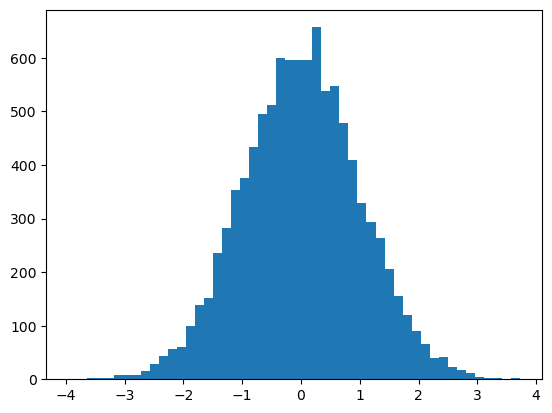

In [19]:
fig = plt.figure()
ax = plt.axes()
ax.hist(arr, bins=50)
plt.show()

## The concreteness of visualization for functions

In [20]:
eps = 1e-06 # epsilon, a tiny number to avoid infinity
p = np.linspace(0 + eps, 1 - eps, 10000)
log_loss_0 = -np.log(1-p)
log_loss_1 = -np.log(p)

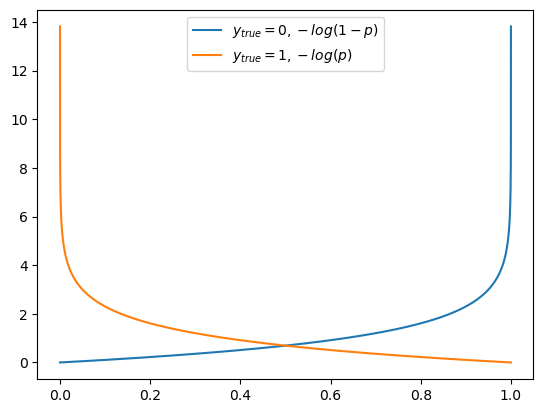

In [21]:
fig = plt.figure()
ax = plt.axes()
ax.plot(p, log_loss_0, label='$y_{true}=0, -log(1-p)$')
ax.plot(p, log_loss_1, label='$y_{true}=1, -log(p)$')
ax.legend()
plt.show()

## The concreteness of visualization for functions

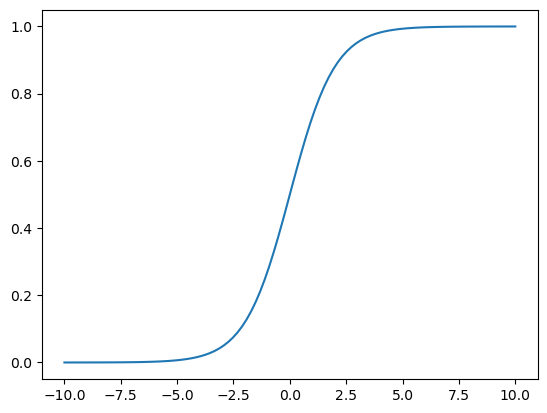

In [22]:
x = np.linspace(-10, 10, 100)
fx = 1 / (1 + np.exp(-x))
fig = plt.figure()
ax = plt.axes()
ax.plot(x, fx)
plt.show()

## The classic visualizations of all time

- [Charles Minard's map of Napoleon's disastrous Russian campaign of 1812](https://en.wikipedia.org/wiki/Charles_Joseph_Minard#/media/File:Minard.png).
- [Hans Rosling's 200 Countries, 200 Years, 4 Minutes](https://youtu.be/jbkSRLYSojo).

## Characteristics of a good visualization

- Informative.
- Simple.
- Pretty.

## Two ways to plot

## The most challenging part for matplotlib newbies is its various plotting syntaxes

## There are 2 plotting syntaxes to adapt

- Matlab style.
- Object-oriented style.

## Plotting with matlab style: stateful interface

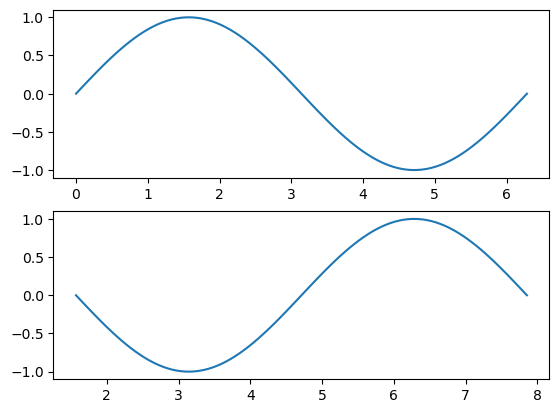

In [23]:
x1 = np.linspace(0, np.pi*2, 100)
x2 = np.linspace(np.pi * 0.5, np.pi*2.5, 100)
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(x1, np.sin(x1))
plt.subplot(2, 1, 2)
plt.plot(x2, np.cos(x2))
plt.show()

## Plotting with object-oriented style: object method interface

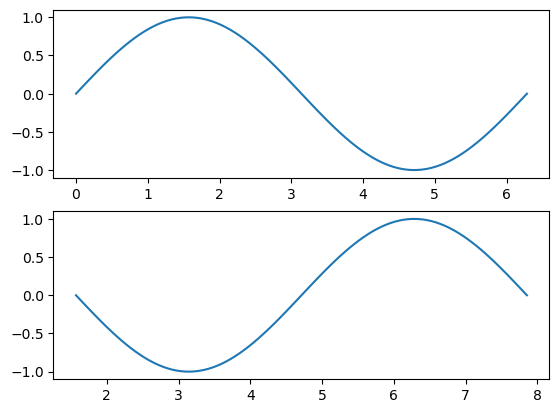

In [24]:
fig, axes = plt.subplots(2, 1)
axes[0].plot(x1, np.sin(x1))
axes[1].plot(x2, np.cos(x2))
plt.show()

## We will adapt the object-oriented style.

## A Glimpse on Pandas

## What is `pandas`?

> Flexible and powerful data analysis / manipulation library for Python, providing labeled data structures similar to R data.frame objects, statistical functions, and much more.

Source: <https://github.com/pandas-dev/pandas>

## Why `pandas`?

Python used to have a weak spot in its analysis capability due to it did not have an appropriate structure handling the common tabular datasets. Pythonists had to switch to a more data-centric language like R or Matlab during the analysis stage until the presence of `pandas`.

## Pandas is officially aliased as `pd`

In [25]:
import pandas as pd

## What does `pandas` mean?

![](https://media.giphy.com/media/46Zj6ze2Z2t4k/giphy.gif)

Source: <https://giphy.com/>

## Turns out its naming has nothing to do with panda the animal, it refers to three primary class customed by its author [Wes McKinney](https://wesmckinney.com/)

- **Pan**el(Deprecated since version 0.20.0)
- **Da**taFrame
- **S**eries

## In order to master `pandas`, it is vital to understand the relationships between `Index`, `ndarray`, `Series`, and `DataFrame`

- An `Index` and a `ndarray` assembles a `Series`.
- A couple of `Series` that sharing the same `Index` can then form a `DataFrame`.

## `Index` from Pandas

The simplest way to create an `Index` is using `pd.Index()`.

In [26]:
prime_indices = pd.Index([2, 3, 5, 7, 11, 13, 17, 19, 23, 29])
type(prime_indices)

pandas.core.indexes.base.Index

## An `Index` is like a combination of `tuple` and `set`

In [27]:
# immutable
prime_indices = pd.Index([2, 3, 5, 7, 11, 13, 17, 19, 23, 29])
try:
    prime_indices[-1] = 31
except TypeError as e:
    print(e)

Index does not support mutable operations


In [28]:
# Index has the characteristics of a set
odd_indices = pd.Index(range(1, 30, 2))
print(prime_indices.intersection(odd_indices))         # prime_indices & odd_indices
print(prime_indices.union(odd_indices))                # prime_indices | odd_indices
print(prime_indices.symmetric_difference(odd_indices)) # prime_indices ^ odd_indices
print(prime_indices.difference(odd_indices))
print(odd_indices.difference(prime_indices))

Index([3, 5, 7, 11, 13, 17, 19, 23, 29], dtype='int64')
Index([1, 2, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29], dtype='int64')
Index([1, 2, 9, 15, 21, 25, 27], dtype='int64')
Index([2], dtype='int64')
Index([1, 9, 15, 21, 25, 27], dtype='int64')


## `Series` from Pandas

The simplest way to create a `Series` is using `pd.Series()`.

In [29]:
prime_series = pd.Series([2, 3, 5, 7, 11, 13, 17, 19, 23, 29])
print(type(prime_series))
print(prime_series)

<class 'pandas.core.series.Series'>
0     2
1     3
2     5
3     7
4    11
5    13
6    17
7    19
8    23
9    29
dtype: int64


## A `Series` is a combination of `Index` and `ndarray`

In [30]:
print(type(prime_series.index))
print(type(prime_series.values))

<class 'pandas.core.indexes.range.RangeIndex'>
<class 'numpy.ndarray'>


## `DataFrame` from Pandas

The simplest way to create a `DataFrame` is using `pd.DataFrame()`.

In [31]:
request_url = "https://www.imdb.com/chart/top"
request_headers = {
    "accept-language": "en-US,en;q=1.0"
}
response = requests.get(request_url, headers=request_headers)
soup = BeautifulSoup(response.text)
titles = [e.text.strip() for e in soup.select(".titleColumn a")]
years = [int(e.text.replace("(", "").replace(")", "")) for e in soup.select(".secondaryInfo")]
ratings = [float(e.text) for e in soup.select("strong")]

In [32]:
movie_df = pd.DataFrame()
movie_df["title"] = titles
movie_df["year"] = years
movie_df["rating"] = ratings
movie_df

,title,year,rating
0,The Shawshank Redemption,1994,9.2
1,The Godfather,1972,9.2
2,The Dark Knight,2008,9.0
3,The Godfather Part II,1974,9.0
4,12 Angry Men,1957,9.0
...,...,...,...
245,Life of Brian,1979,8.0
246,The Iron Giant,1999,8.0
247,The Help,2011,8.0
248,Aladdin,1992,8.0


## A `DataFrame` is a combination of multiple `Series` sharing the same `Index`

In [33]:
print(type(movie_df.index))
print(type(movie_df["title"]))
print(type(movie_df["rating"]))

<class 'pandas.core.indexes.range.RangeIndex'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


## A Glimpse on Scikit-Learn

## What is Scikit-Learn?

> Scikit-learn is an open source machine learning library that supports supervised and unsupervised learning. It also provides various tools for model fitting, data preprocessing, model selection, model evaluation, and many other utilities.

Source: <https://scikit-learn.org/stable/getting_started.html>

## Import with specific functions/classes

```python
from sklearn import FUNCTION/CLASS
```

Source: <https://scikit-learn.org/stable/getting_started.html>

## Why Scikit-Learn?

- Clean, uniform, and streamlined API.
- Useful and complete online documentation.
- Uniform API:
    - Consistency.
    - Inspection.
    - Limited object hierarchy.
    - Composition.
    - Sensible defaults.

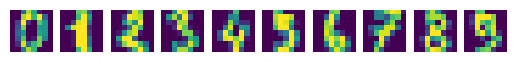

In [34]:
from sklearn import datasets

m = 10
fig, axes = plt.subplots(1, m)
digits = datasets.load_digits()
for ax, image in zip(axes, digits.images):
    ax.set_axis_off()
    ax.imshow(image)

In [35]:
from sklearn import svm
from sklearn.model_selection import train_test_split

X = digits.images.reshape(1797, 64)
y = digits.target
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, random_state=42)
clf = svm.SVC(gamma=0.001)
clf.fit(X_train, y_train)
y_hat = clf.predict(X_valid)

In [36]:
errors = np.sum(y_valid != y_hat).sum()
print(errors)
print(y_valid.size)
print(errors / y_valid.size)

6
594
0.010101010101010102


## A Glimpse on TensorFlow Keras

## What is Tensorflow?

- TensorFlow is a backend engine for machine learning and deep learning.
- TensorFlow was released in 2015 by Google.
- A backend engine defines tensor opearation, the derivative of cost functions, and optimization algorithms as classes or functions.
- PyTorch, Theano, and Microsoft Cognitive Toolkit(CNTK) are other famous backend engines.

## What is Tensorflow Keras?

- Keras is a deep learning API written in Python, running on top of the machine learning platform TensorFlow. It was developed with a focus on enabling fast experimentation.
- Keras was released in 2015 by François Chollet.

In [37]:
from tensorflow import keras

2023-05-23 22:45:39.067201: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


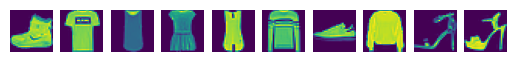

In [38]:
(x_train, y_train), (x_valid, y_valid) = keras.datasets.fashion_mnist.load_data()
m = 10
fig, axes = plt.subplots(1, m)
for ax, image, label in zip(axes, x_train, y_train):
    ax.set_axis_off()
    ax.imshow(image)

In [39]:
fashion_mnist_labels = {
    0: "T-shirt/top",  # index 0
    1: "Trouser",      # index 1
    2: "Pullover",     # index 2 
    3: "Dress",        # index 3 
    4: "Coat",         # index 4
    5: "Sandal",       # index 5
    6: "Shirt",        # index 6 
    7: "Sneaker",      # index 7 
    8: "Bag",          # index 8 
    9: "Ankle boot"    # index 9
}

In [40]:
num_classes = 10
model = keras.Sequential(
    [
        keras.Input(shape=(28, 28, 1)),
        keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(num_classes, activation="softmax"),
    ]
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

2023-05-23 22:45:44.137532: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [41]:
x_train = x_train.astype("float32") / 255
x_valid = x_valid.astype("float32") / 255
x_train = x_train[:, :, :, np.newaxis]
x_valid = x_valid[:, :, :, np.newaxis]
y_train = keras.utils.to_categorical(y_train, num_classes)
y_valid = keras.utils.to_categorical(y_valid, num_classes)

In [42]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=128, epochs=15, validation_split=0.1)
y_hat = model.predict(x_valid)

Epoch 1/15
422/422 [==============================] - 34s 78ms/step - loss: 0.7019 - accuracy: 0.7456 - val_loss: 0.4570 - val_accuracy: 0.8383
Epoch 2/15
422/422 [==============================] - 32s 76ms/step - loss: 0.4591 - accuracy: 0.8354 - val_loss: 0.3962 - val_accuracy: 0.8638
Epoch 3/15
422/422 [==============================] - 33s 77ms/step - loss: 0.4094 - accuracy: 0.8548 - val_loss: 0.3531 - val_accuracy: 0.8737
Epoch 4/15
422/422 [==============================] - 33s 77ms/step - loss: 0.3809 - accuracy: 0.8639 - val_loss: 0.3427 - val_accuracy: 0.8775
Epoch 5/15
422/422 [==============================] - 33s 79ms/step - loss: 0.3596 - accuracy: 0.8726 - val_loss: 0.3206 - val_accuracy: 0.8865
Epoch 6/15
422/422 [==============================] - 33s 78ms/step - loss: 0.3431 - accuracy: 0.8774 - val_loss: 0.3141 - val_accuracy: 0.8872
Epoch 7/15
422/422 [==============================] - 34s 80ms/step - loss: 0.3314 - accuracy: 0.8811 - val_loss: 0.2946 - val_accuracy:

In [43]:
loss, accuracy = model.evaluate(x_valid, y_valid)
print("Accuracy: {:.2f}%".format(accuracy*100))
print("Error rate: {:.2f}%".format((1 - accuracy)*100))

313/313 [==============================] - 2s 7ms/step - loss: 0.2812 - accuracy: 0.8984
Accuracy: 89.84%
Error rate: 10.16%
